# Dependencies

In [1]:
!pip install transformers datasets torch peft timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00


In [3]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.0 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Vit Training on 16 Milestones

In [ ]:
from datasets import load_dataset, DatasetDict
import os

# Define the dataset directory
train_dataset_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/organized_images'

# Load the dataset
train_dataset = load_dataset('imagefolder', data_dir=train_dataset_dir)

Resolving data files:   0%|          | 0/500 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
from transformers import AutoImageProcessor

# Load the image processor for ViT
image_processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Define a preprocessing function
def preprocess_images(examples):
    examples['pixel_values'] = [image_processor(images=image, return_tensors='pt')['pixel_values'][0] for image in examples['image']]
    return examples

# Apply the preprocessing to the dataset
train_dataset = train_dataset.map(preprocess_images, batched=True)
train_dataset = train_dataset.remove_columns(['image'])  # Remove the original image column
train_dataset = train_dataset['train']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
# Define the dataset directory
test_dataset_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/Datasets/pyramidsnapshot/images'

# Load the dataset
test_dataset = load_dataset('imagefolder', data_dir=test_dataset_dir)
test_split = test_dataset['train'].train_test_split(test_size=0.05, seed=42)
test_dataset = test_split['test']

# Apply the preprocessing to the dataset
test_dataset = test_dataset.map(preprocess_images, batched=True)
test_dataset = test_dataset.remove_columns(['image'])  # Remove the original image column

Resolving data files:   0%|          | 0/12042 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

In [ ]:
# Inspect the label mapping
train_label_mapping = train_dataset.features['label'].int2str
test_label_mapping = test_dataset.features['label'].int2str

# Print the mapping
num_labels = train_dataset.features['label'].num_classes

for label_idx in range(num_labels):
    print(f"training Label {label_idx}: {train_label_mapping(label_idx)}")
    print(f"testing Label {label_idx}: {test_label_mapping(label_idx)}")

training Label 0: brick_wall
testing Label 0: Brick_wall
training Label 1: column_structure
testing Label 1: Column_structure
training Label 2: diagonal
testing Label 2: Diagonal
training Label 3: hello
testing Label 3: Hello_world
training Label 4: offTrack
testing Label 4: Off_track
training Label 5: offset_extra_credit
testing Label 5: Offset_extra_credit
training Label 6: offset_pyramid
testing Label 6: Offset_pyramid
training Label 7: parallelogram
testing Label 7: Parallelogram
training Label 8: perfect_extra
testing Label 8: Perfect_extra
training Label 9: perfect_pyramid
testing Label 9: Perfect_pyramid
training Label 10: pyramid_like
testing Label 10: Pyramid_like
training Label 11: rectangle
testing Label 11: Rectangle
training Label 12: right
testing Label 12: Right_triangle
training Label 13: scalene
testing Label 13: Scalene_triangle
training Label 14: single
testing Label 14: Single_row
training Label 15: two_row
testing Label 15: Two_row


In [ ]:
from transformers import AutoModelForImageClassification
from peft import LoraConfig, get_peft_model

from transformers import AutoModelForImageClassification

# Load the pretrained ViT model, allowing for size mismatches
model_name = 'google/vit-base-patch16-224'
model = AutoModelForImageClassification.from_pretrained(
    model_name,
    num_labels=16,  # Set to your number of classes
    ignore_mismatched_sizes=True  # This ignores the size mismatch error
)

# The classifier head is now ready for fine-tuning on your 16-class dataset
# Define the LoRA configuration
lora_config = LoraConfig(
    r=8,  # LoRA rank
    lora_alpha=32,  # Scaling factor
    target_modules=['query', 'key', 'value'],  # Modules to apply LoRA to
    lora_dropout=0.1,  # Dropout probability
    task_type='VISION'  # Task type
)

# Apply LoRA to the model
model = get_peft_model(model, lora_config)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([16]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([16, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

PeftModel(
  (base_model): LoraModel(
    (model): ViTForImageClassification(
      (vit): ViTModel(
        (embeddings): ViTEmbeddings(
          (patch_embeddings): ViTPatchEmbeddings(
            (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
          )
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (encoder): ViTEncoder(
          (layer): ModuleList(
            (0-11): 12 x ViTLayer(
              (attention): ViTSdpaAttention(
                (attention): ViTSdpaSelfAttention(
                  (query): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=True)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768, out_features=8, bias=False)
                    )
                    (lora_B): ModuleDict(
               

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.396500,2.243462,0.343284,0.311771
2,0.720200,2.087885,0.396352,0.366276
3,0.535200,2.133244,0.369818,0.314959
4,0.151100,2.179414,0.396352,0.374622
5,0.128600,2.172956,0.412935,0.400235
6,0.138200,2.347815,0.416252,0.372069
7,0.115600,2.447671,0.396352,0.368357
8,0.037800,2.321947,0.419569,0.386686
9,0.039600,2.420966,0.406302,0.378557
10,0.018100,2.402917,0.412935,0.385365


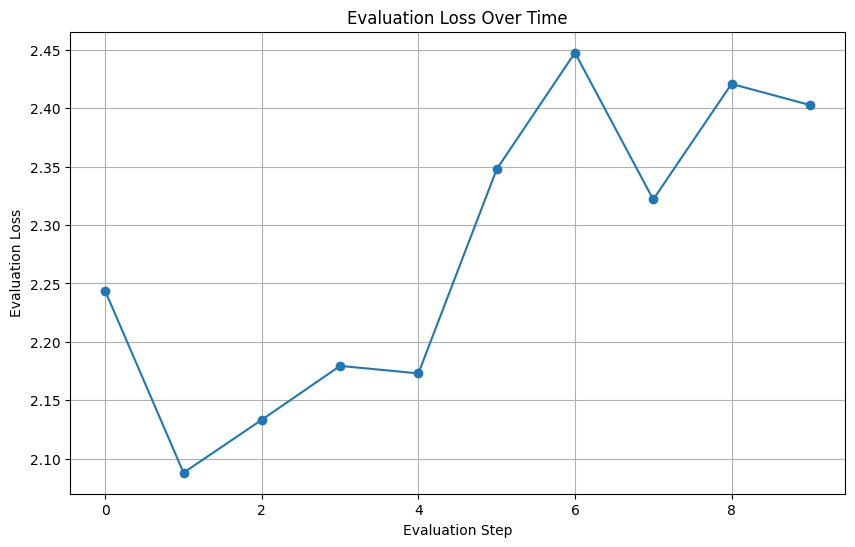

TrainOutput(global_step=630, training_loss=0.41688706023352484, metrics={'train_runtime': 1316.0864, 'train_samples_per_second': 3.799, 'train_steps_per_second': 0.479, 'total_flos': 3.8950622871552e+17, 'train_loss': 0.41688706023352484, 'epoch': 10.0})

In [ ]:
from transformers import Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt
import numpy as np
import evaluate

# Define metrics
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

# Set a confidence threshold for low confidence
CONFIDENCE_THRESHOLD = 0.125  # Adjust this threshold based on your data

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)
    predictions = torch.argmax(probabilities, dim=-1).numpy()

    # Adjust predictions:
    for i, probs in enumerate(probabilities):
        # Exclude category 4 from the max confidence calculation
        filtered_probs = torch.cat((probs[:4], probs[5:]))
        max_confidence = torch.max(filtered_probs).item()

        if max_confidence < CONFIDENCE_THRESHOLD:
            predictions[i] = 4  # assign to category 15

    # Calculate accuracy
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)

    # Calculate F1 score
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')

    # Combine both metrics
    return {
        'accuracy': accuracy['accuracy'],
        'f1': f1['f1'],
    }

# Custom callback to track evaluation loss
class EvalLossCallback(TrainerCallback):
    def __init__(self):
        self.eval_losses = []

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            self.eval_losses.append(metrics['eval_loss'])

    def on_train_end(self, args, state, control, **kwargs):
        # Plot eval loss over time
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.eval_losses)), self.eval_losses, marker='o')
        plt.title('Evaluation Loss Over Time')
        plt.xlabel('Evaluation Step')
        plt.ylabel('Evaluation Loss')
        plt.grid(True)
        plt.show()

# Instantiate the custom callback
eval_loss_callback = EvalLossCallback()

# Define training arguments
training_args = TrainingArguments(
    f'Vit_Lora',
    remove_unused_columns=False,
    eval_strategy='epoch',
    learning_rate=0.0009140739981969284,
    per_device_train_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.2701733791101435,
    logging_steps=10,
    label_names=['labels'],
)

trainer = Trainer(
    model=model.to(device),
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    tokenizer=image_processor,
    callbacks=[eval_loss_callback]
)

# Fine-tune the model
trainer.train()

In [ ]:
import optuna
import json
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import evaluate

# Define metrics
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Calculate accuracy
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)

    # Calculate F1 score
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')

    # Combine both metrics
    return {
        'accuracy': accuracy['accuracy'],
        'f1': f1['f1'],
    }

def model_init():
    return model.to(device)

def objective(trial):
    # Hyperparameter suggestions
    learning_rate = trial.suggest_float('learning_rate', 8e-5, 1.5e-4, log=True)
    weight_decay = trial.suggest_float('weight_decay', 0.2, 0.3)
    per_device_train_batch_size = trial.suggest_categorical('per_device_train_batch_size', [4, 8, 16])
    num_train_epochs = trial.suggest_int('num_train_epochs', 1, 5)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f'Vit_Lora_{trial.number}',
        remove_unused_columns=False,
        eval_strategy='epoch',
        learning_rate=learning_rate,
        per_device_train_batch_size=per_device_train_batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        logging_steps=10,
        label_names=['labels'],
    )

    # Initialize Trainer
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
        tokenizer=image_processor,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()

    # Save the model, tokenizer, and metrics for this trial
    output_dir = f"/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/lora_vit_models/trial_{trial.number}"
    trainer.save_model(output_dir)
    trainer.tokenizer.save_pretrained(output_dir)

    # Save evaluation metrics
    metrics_path = f"{output_dir}/metrics.json"
    with open(metrics_path, 'w') as f:
        json.dump(eval_results, f)

    # Return the F1 score
    return eval_results['eval_f1']

# Create Optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters
study.optimize(objective, n_trials=20)

# Get the best trial
best_trial = study.best_trial

# Extract the best model directory
best_model_dir = f"/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/lora_vit_models/trial_{best_trial.number}"

print("Best model saved in:", best_model_dir)

# Vit For Knowledge States Body

### Import Trainign and Testing Datasets

In [ ]:
from datasets import load_dataset, DatasetDict
from transformers import AutoImageProcessor
import os

# Load the image processor for ViT
image_processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Define a preprocessing function
def preprocess_images(examples):
    processed_images = []

    for image in examples['image']:
        try:
            # Convert RGBA to RGB if necessary
            if image.mode == 'RGBA':
                image = image.convert('RGB')

            # Process the image using your image processor
            pixel_values = image_processor(images=image, return_tensors='pt')['pixel_values'][0]
            processed_images.append(pixel_values)
        except Exception as e:
            # Handle any potential errors during processing
            print(f"Error processing image: {e}")
            processed_images.append(None)  # Append None or handle as needed

    # Store the processed pixel values
    examples['pixel_values'] = processed_images

    return examples

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
# Real student data
real_image_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/Datasets/pyramidsnapshot/scaled_up_images_ks/bodies_scaled_images'

# Load the dataset for hot start porblem
real_images = load_dataset('imagefolder', data_dir=real_image_dir)
first_split = real_images['train'].train_test_split(test_size=0.01, seed=42)
test_dataset_real_images = first_split['test']
second_split = first_split['train'].train_test_split(test_size=0.1, seed=42)
train_valid_real = second_split['test']
train_valid_split = train_valid_real.train_test_split(test_size=0.2, seed=42)
train_dataset_real = train_valid_split['train']
valid_dataset_real = train_valid_split['test']

Resolving data files:   0%|          | 0/71412 [00:00<?, ?it/s]

Computing checksums:  21%|##1       | 15158/71412 [00:05<00:18, 3031.46it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# Apply the preprocessing to the dataset
test_dataset = test_dataset_real_images.map(preprocess_images, batched=True)
test_dataset = test_dataset.remove_columns(['image'])  # Remove the original image column

valid_dataset = valid_dataset_real.map(preprocess_images, batched=True)
valid_dataset = valid_dataset.remove_columns(['image'])  # Remove the original image column

train_dataset = train_dataset_real.map(preprocess_images, batched=True)
train_dataset = train_dataset.remove_columns(['image'])  # Remove the original image column

Map:   0%|          | 0/715 [00:00<?, ? examples/s]

Map:   0%|          | 0/1414 [00:00<?, ? examples/s]

Map:   0%|          | 0/5656 [00:00<?, ? examples/s]

In [ ]:
# Simulated Data
train_dataset_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/new_ks_10000_images'

# Load the dataset
train_dataset = load_dataset('imagefolder', data_dir=train_dataset_dir)
first_split = train_dataset['train'].train_test_split(test_size=0.6, seed=42)
train_dataset = first_split['train']
train_valid_split = train_dataset.train_test_split(test_size=0.1667, seed=42)
train_dataset = train_valid_split['train']
valid_dataset = train_valid_split['test']

train_dataset = train_dataset.map(preprocess_images, batched=True)
train_dataset = train_dataset.remove_columns(['image'])  # Remove the original image column

valid_dataset = valid_dataset.map(preprocess_images, batched=True)
valid_dataset = valid_dataset.remove_columns(['image'])  # Remove the original image column

Resolving data files:   0%|          | 0/9999 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/3332 [00:00<?, ? examples/s]

Map:   0%|          | 0/667 [00:00<?, ? examples/s]

In [ ]:
# Real student data for test
real_image_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/Datasets/pyramidsnapshot/scaled_up_images_ks/bodies_scaled_images'

# Load the dataset for hot start porblem
real_images = load_dataset('imagefolder', data_dir=real_image_dir)
first_split = real_images['train'].train_test_split(test_size=0.01, seed=42)
test_dataset_real_images = first_split['test']

# Apply the preprocessing to the dataset
test_dataset = test_dataset_real_images.map(preprocess_images, batched=True)
test_dataset = test_dataset.remove_columns(['image'])  # Remove the original image column

Resolving data files:   0%|          | 0/71412 [00:00<?, ?it/s]

Computing checksums:  19%|#9        | 13768/71412 [00:05<00:20, 2753.33it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/715 [00:00<?, ? examples/s]

In [ ]:
# Save Training and Testing Datasets
training_dataset_saving_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/Train_5000'
valid_dataset_saving_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/Valid_1000'
testing_dataset_saving_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/Test_700'
train_dataset.save_to_disk(training_dataset_saving_dir)
valid_dataset.save_to_disk(valid_dataset_saving_dir)
test_dataset.save_to_disk(testing_dataset_saving_dir)

Saving the dataset (0/5 shards):   0%|          | 0/3332 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/667 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/715 [00:00<?, ? examples/s]

## boasting dataset for ks_2


In [6]:
from datasets import load_dataset, DatasetDict
from transformers import AutoImageProcessor
import os

# Load the image processor for ViT
image_processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Define a preprocessing function
def preprocess_images(examples):
    processed_images = []

    for image in examples['image']:
        try:
            # Convert RGBA to RGB if necessary
            if image.mode == 'RGBA':
                image = image.convert('RGB')

            # Process the image using your image processor
            pixel_values = image_processor(images=image, return_tensors='pt')['pixel_values'][0]
            processed_images.append(pixel_values)
        except Exception as e:
            # Handle any potential errors during processing
            print(f"Error processing image: {e}")
            processed_images.append(None)  # Append None or handle as needed

    # Assign the numeric value for "knowledge_state_2" (which is 1 based on your mapping)
    knowledge_state_2_label = 1

    # Create a list of labels with the same value for all entries
    labels = [knowledge_state_2_label] * len(processed_images)

    # Store the processed pixel values
    return {"labels": labels, 'image': examples['image'], 'pixel_values': processed_images}

ks_2_simulated_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/new_ks_10000_images/knowledge_state_2'
training_boosted_dataset = load_dataset('imagefolder', data_dir=ks_2_simulated_dir)
training_boosted_dataset = training_boosted_dataset['train']

# Apply the preprocessing to the dataset
processed_boosting_dataset = training_boosted_dataset.map(preprocess_images, batched=True)
training_boosted_dataset = processed_boosting_dataset.remove_columns(['image'])  # Remove the original image column

# save the boosted dataset
training_boosted_save_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/ks_2_boosted'
training_boosted_dataset.save_to_disk(training_boosted_save_dir)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Resolving data files:   0%|          | 0/789 [00:00<?, ?it/s]

Map:   0%|          | 0/789 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/789 [00:00<?, ? examples/s]

## Load the preprocessed datasets

In [5]:
# Load the dataset from disk
from datasets import load_from_disk

training_dataset_saving_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/Train_5000'
valid_dataset_saving_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/Valid_1000'
testing_dataset_saving_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/Test_700'
boost_dataset_saving_dir = '/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/ColdStart/ks_2_boosted'

train_dataset = load_from_disk(training_dataset_saving_dir)
valid_dataset = load_from_disk(valid_dataset_saving_dir)
test_dataset = load_from_disk(testing_dataset_saving_dir)
boost_dataset = load_from_disk(boost_dataset_saving_dir)

In [6]:
# Inspect the label mapping
train_label_mapping = train_dataset.features['label'].int2str
test_label_mapping = test_dataset.features['label'].int2str

# Print the mapping
num_labels = train_dataset.features['label'].num_classes

for label_idx in range(num_labels):
    print(f"training Label {label_idx}: {train_label_mapping(label_idx)}")
    print(f"testing Label {label_idx}: {test_label_mapping(label_idx)}")

training Label 0: knowledge_state_1
testing Label 0: knowledge_state_1
training Label 1: knowledge_state_2
testing Label 1: knowledge_state_2
training Label 2: knowledge_state_3
testing Label 2: knowledge_state_3
training Label 3: knowledge_state_4
testing Label 3: knowledge_state_4
training Label 4: knowledge_state_5
testing Label 4: knowledge_state_5


## model loading

In [7]:
import torch
from transformers import AutoModelForImageClassification
from peft import LoraConfig, get_peft_model
from transformers import AutoModelForImageClassification
from transformers import AutoImageProcessor

# Define image_processor
image_processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224')

# Load the pretrained ViT model, allowing for size mismatches
model_name = 'google/vit-base-patch16-224'
model = AutoModelForImageClassification.from_pretrained(
    model_name,
    num_labels=5,  # Set to your number of classes
    ignore_mismatched_sizes=True  # This ignores the size mismatch error
)

# The classifier head is now ready for fine-tuning on your 16-class dataset
# Define the LoRA configuration
lora_config = LoraConfig(
    r=8,  # LoRA rank
    lora_alpha=32,  # Scaling factor
    target_modules=['query', 'key', 'value'],  # Modules to apply LoRA to
    lora_dropout=0.1,  # Dropout probability
    task_type='VISION'  # Task type
)

# Apply LoRA to the model
model = get_peft_model(model, lora_config)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PeftModel(
  (base_model): LoraModel(
    (model): ViTForImageClassification(
      (vit): ViTModel(
        (embeddings): ViTEmbeddings(
          (patch_embeddings): ViTPatchEmbeddings(
            (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
          )
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (encoder): ViTEncoder(
          (layer): ModuleList(
            (0-11): 12 x ViTLayer(
              (attention): ViTSdpaAttention(
                (attention): ViTSdpaSelfAttention(
                  (query): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=True)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768, out_features=8, bias=False)
                    )
                    (lora_B): ModuleDict(
               

In [8]:
# Print the size of the original model
original_param_count = sum(p.numel() for p in model.parameters())
print(f"Original model parameter count: {original_param_count:,}")

# Print the size of the model after applying LoRA
lora_param_count = sum(p.numel() for p in model.parameters())
print(f"LoRA model parameter count: {lora_param_count:,}")

# Calculate the number of parameters added by LoRA
lora_added_param_count = lora_param_count - original_param_count
print(f"Number of parameters added by LoRA: {lora_added_param_count:,}")

Original model parameter count: 86,244,869
LoRA model parameter count: 86,244,869
Number of parameters added by LoRA: 0


## hyperparameters fine tuning

In [ ]:
import optuna
import json
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import evaluate

# Define metrics
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Calculate accuracy
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)

    # Calculate F1 score
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')

    # Combine both metrics
    return {
        'accuracy': accuracy['accuracy'],
        'f1': f1['f1'],
    }

def model_init():
    return model.to(device)

def objective(trial):
    # Hyperparameter suggestions
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 2e-3, log=True)
    weight_decay = trial.suggest_float('weight_decay', 0.15, 0.35)
    per_device_train_batch_size = trial.suggest_categorical('per_device_train_batch_size', [4, 8, 16, 32])
    num_train_epochs = trial.suggest_int('num_train_epochs', 1, 3)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f'Vit_Lora_{trial.number}',
        remove_unused_columns=False,
        eval_strategy='epoch',
        learning_rate=learning_rate,
        per_device_train_batch_size=per_device_train_batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        logging_steps=10,
        label_names=['labels'],
    )

    # Initialize Trainer
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
        compute_metrics=compute_metrics,
        tokenizer=image_processor,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()
    return eval_results['eval_f1']

# Create Optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters
study.optimize(objective, n_trials=20)

# Get the best trial
best_trial = study.best_trial
print("Best model is trial:", best_trial.number)
print('Best model f1 score:', best_trial.value)
print('Best model params:', best_trial.params)

[I 2024-10-15 18:29:06,612] A new study created in memory with name: no-name-0f220cd4-52f5-4aa0-9363-37ebf345ad43


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.150800,0.227351,0.925037,0.924931
2,0.245200,0.121910,0.968516,0.968191
3,0.004100,0.129822,0.962519,0.962078


[I 2024-10-15 18:54:20,835] Trial 0 finished with value: 0.9620775755207379 and parameters: {'learning_rate': 0.0010382238423522643, 'weight_decay': 0.3055683192436609, 'per_device_train_batch_size': 8, 'num_train_epochs': 3}. Best is trial 0 with value: 0.9620775755207379.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.036800,0.119995,0.964018,0.963695
2,0.047400,0.112436,0.965517,0.965230


[I 2024-10-15 19:11:21,920] Trial 1 finished with value: 0.9652300706063206 and parameters: {'learning_rate': 6.003264140156535e-05, 'weight_decay': 0.21371414591309984, 'per_device_train_batch_size': 32, 'num_train_epochs': 2}. Best is trial 1 with value: 0.9652300706063206.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.076300,0.132392,0.961019,0.960803


[W 2024-10-15 19:22:17,243] Trial 2 failed with parameters: {'learning_rate': 0.0009860768233332508, 'weight_decay': 0.20240690103156772, 'per_device_train_batch_size': 32, 'num_train_epochs': 3} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-8-d4bb2a4756fb>", line 62, in objective
    trainer.train()
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 1938, in train
    return inner_training_loop(
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 2236, in _inner_training_loop
    for step, inputs in enumerate(epoch_iterator):
  File "/usr/local/lib/python3.10/dist-packages/accelerate/data_loader.py", line 561, in __iter__
    next_batch = next(dataloader_iter)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.

KeyboardInterrupt: 

## model training

In [9]:
import os
os.environ["WANDB_DISABLED"] = "true"

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-10-d61d5ec4cb31>:120: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Class 0,F1 Class 1,F1 Class 2,F1 Class 3,F1 Class 4
1,0.022200,0.187509,0.937031,0.936710,0.982353,0.924731,0.887160,0.961131,0.914127
2,0.071100,0.127067,0.962519,0.962518,0.984985,0.957447,0.930612,0.971223,0.958333
3,0.007800,0.122071,0.968516,0.968302,0.988166,0.948454,0.949153,0.974910,0.963542
4,0.000500,0.097599,0.974513,0.974340,0.991098,0.946237,0.954733,0.985507,0.971429
5,0.004200,0.107042,0.973013,0.972826,0.991098,0.946237,0.950413,0.985507,0.968912


{'eval_loss': 0.18750929832458496, 'eval_accuracy': 0.9370314842578711, 'eval_f1': 0.9367100587754392, 'eval_f1_class_0': 0.9823529411764705, 'eval_f1_class_1': 0.9247311827956989, 'eval_f1_class_2': 0.8871595330739299, 'eval_f1_class_3': 0.9611307420494699, 'eval_f1_class_4': 0.9141274238227147, 'eval_runtime': 75.9754, 'eval_samples_per_second': 8.779, 'eval_steps_per_second': 1.106, 'epoch': 1.0}
{'eval_loss': 0.12706708908081055, 'eval_accuracy': 0.9625187406296851, 'eval_f1': 0.962518191819939, 'eval_f1_class_0': 0.984984984984985, 'eval_f1_class_1': 0.9574468085106383, 'eval_f1_class_2': 0.9306122448979591, 'eval_f1_class_3': 0.9712230215827338, 'eval_f1_class_4': 0.9583333333333334, 'eval_runtime': 72.7193, 'eval_samples_per_second': 9.172, 'eval_steps_per_second': 1.155, 'epoch': 2.0}
{'eval_loss': 0.12207061052322388, 'eval_accuracy': 0.9685157421289355, 'eval_f1': 0.9683016935937112, 'eval_f1_class_0': 0.9881656804733728, 'eval_f1_class_1': 0.9484536082474226, 'eval_f1_class_

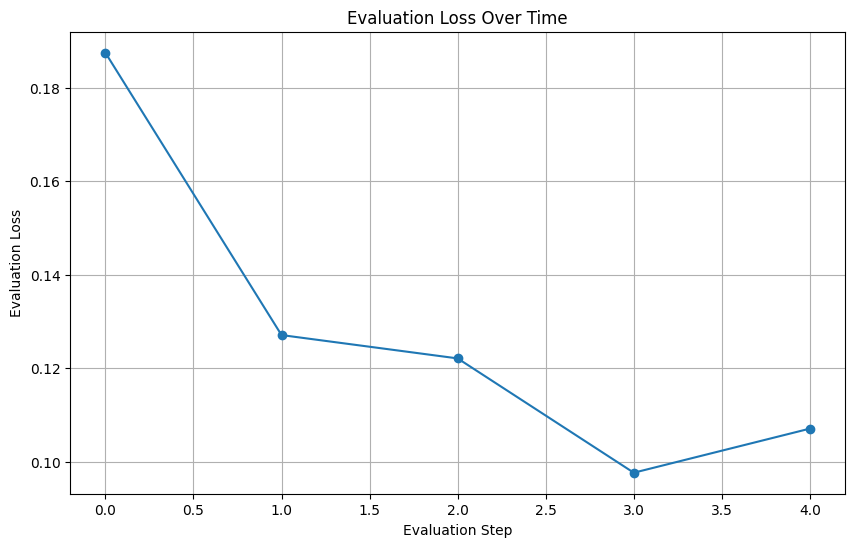

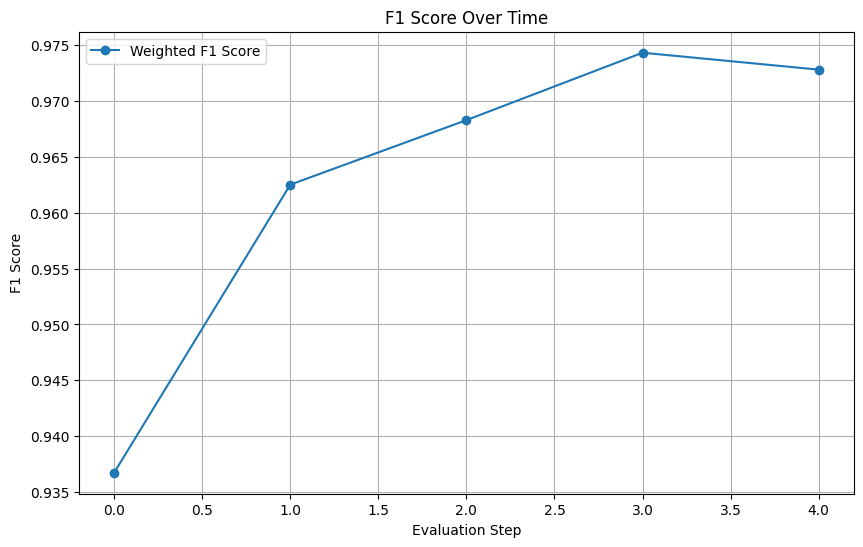

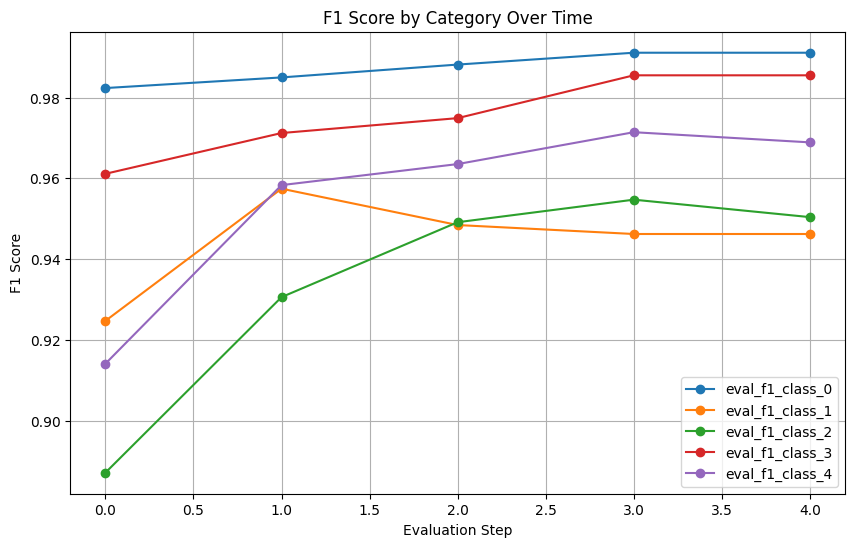

TrainOutput(global_step=2085, training_loss=0.12427734054772438, metrics={'train_runtime': 2494.2645, 'train_samples_per_second': 6.679, 'train_steps_per_second': 0.836, 'total_flos': 1.2977074733775667e+18, 'train_loss': 0.12427734054772438, 'epoch': 5.0})

In [10]:
from transformers import Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt
import numpy as np
import torch
import evaluate
import os

# Define metrics
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

# Set a confidence threshold for low confidence
CONFIDENCE_THRESHOLD = 0.125  # Adjust this threshold based on your data

# Create a directory to save the plots
if not os.path.exists('plots'):
    os.makedirs('plots')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)
    predictions = torch.argmax(probabilities, dim=-1).numpy()

    # Adjust predictions:
    for i, probs in enumerate(probabilities):
        # Exclude category 4 from the max confidence calculation
        filtered_probs = probs[:4]
        max_confidence = torch.max(filtered_probs).item()

        if max_confidence < CONFIDENCE_THRESHOLD:
            predictions[i] = 4  # assign to ks_5

    # Calculate accuracy
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)

    # Calculate F1 score for each category and average
    f1_per_category = f1_metric.compute(predictions=predictions, references=labels, average=None)
    f1_weighted = f1_metric.compute(predictions=predictions, references=labels, average='weighted')

    # Combine both metrics
    return {
        'accuracy': accuracy['accuracy'],
        'f1': f1_weighted['f1'],
        **{f'f1_class_{i}': f1 for i, f1 in enumerate(f1_per_category['f1'])}
    }

# Custom callback to track evaluation metrics
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.eval_losses = []
        self.f1_scores = []
        self.f1_class_scores = {}

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            print(metrics)
            self.eval_losses.append(metrics['eval_loss'])
            self.f1_scores.append(metrics['eval_f1'])

            # Track F1 scores per class
            for key in metrics:
                if key.startswith('eval_f1_class_'):
                    if key not in self.f1_class_scores:
                        self.f1_class_scores[key] = []
                    self.f1_class_scores[key].append(metrics[key])

    def on_train_end(self, args, state, control, **kwargs):
        # Plot eval loss over time
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.eval_losses)), self.eval_losses, marker='o')
        plt.title('Evaluation Loss Over Time')
        plt.xlabel('Evaluation Step')
        plt.ylabel('Evaluation Loss')
        plt.grid(True)
        plt.savefig('plots/eval_loss_over_time.png')
        plt.show()

        # Plot F1 score over time
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.f1_scores)), self.f1_scores, marker='o', label='Weighted F1 Score')
        plt.title('F1 Score Over Time')
        plt.xlabel('Evaluation Step')
        plt.ylabel('F1 Score')
        plt.grid(True)
        plt.legend()
        plt.savefig('plots/f1_score_over_time.png')
        plt.show()

        # Plot F1 scores by category over time
        plt.figure(figsize=(10, 6))
        for key, values in self.f1_class_scores.items():
            plt.plot(range(len(values)), values, marker='o', label=key)
        plt.title('F1 Score by Category Over Time')
        plt.xlabel('Evaluation Step')
        plt.ylabel('F1 Score')
        plt.grid(True)
        plt.legend()
        plt.savefig('plots/f1_score_by_category_over_time.png')
        plt.show()

# Instantiate the custom callback
metrics_callback = MetricsCallback()

# Define training arguments
training_args = TrainingArguments(
    f'Vit_Lora',
    remove_unused_columns=False,
    eval_strategy='epoch',
    learning_rate=0.0010382238423522643,
    per_device_train_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.3055683192436609,
    logging_steps=3,
    label_names=['labels'],
    save_steps=10,
    save_total_limit=2,
    evaluation_strategy="epoch",
)

trainer = Trainer(
    model=model.to(device),
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    tokenizer=image_processor,
    callbacks=[metrics_callback]
)

# Fine-tune the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-11-d1674e6501dd>:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  boosted_trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Class 0,F1 Class 1,F1 Class 2,F1 Class 3,F1 Class 4
1,0.000100,4.704747,0.254873,0.255072,0.755556,0.165261,0.016260,0.135135,0.080000


{'eval_loss': 4.704746723175049, 'eval_accuracy': 0.25487256371814093, 'eval_f1': 0.2550717224675511, 'eval_f1_class_0': 0.7555555555555555, 'eval_f1_class_1': 0.16526138279932545, 'eval_f1_class_2': 0.016260162601626018, 'eval_f1_class_3': 0.13513513513513514, 'eval_f1_class_4': 0.08, 'eval_runtime': 72.4815, 'eval_samples_per_second': 9.202, 'eval_steps_per_second': 1.159, 'epoch': 1.0}


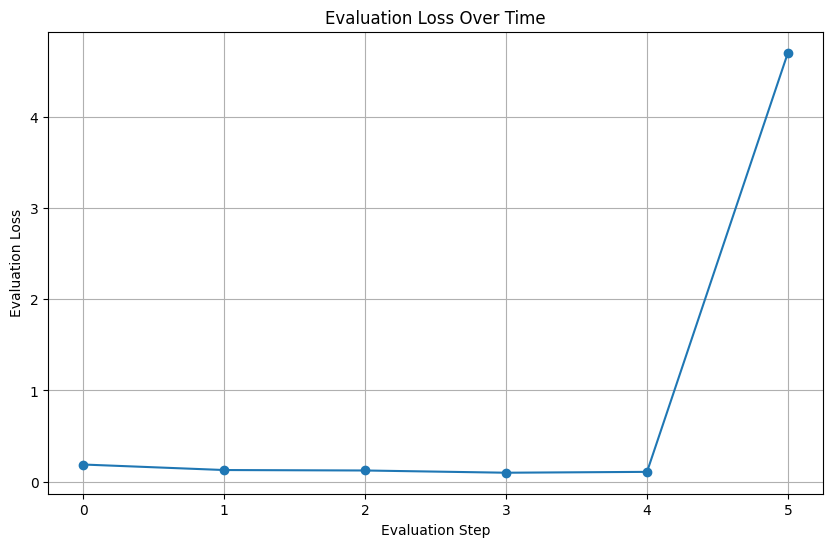

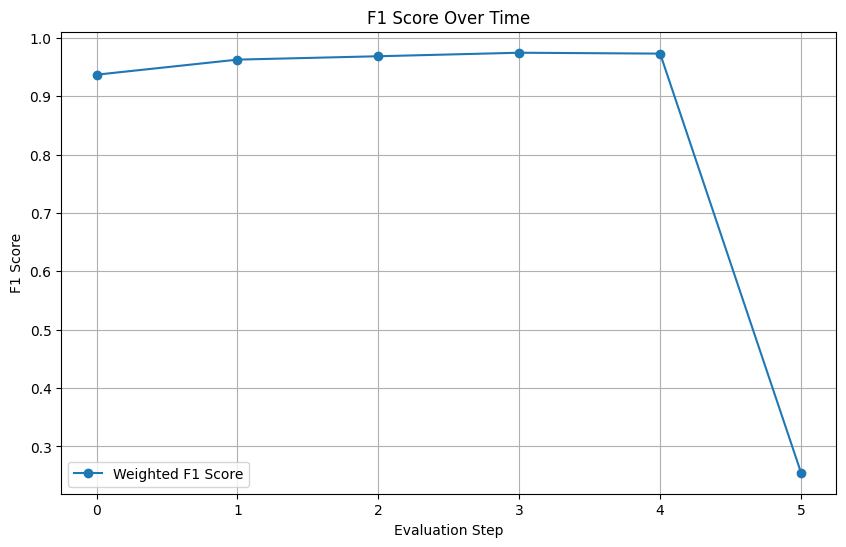

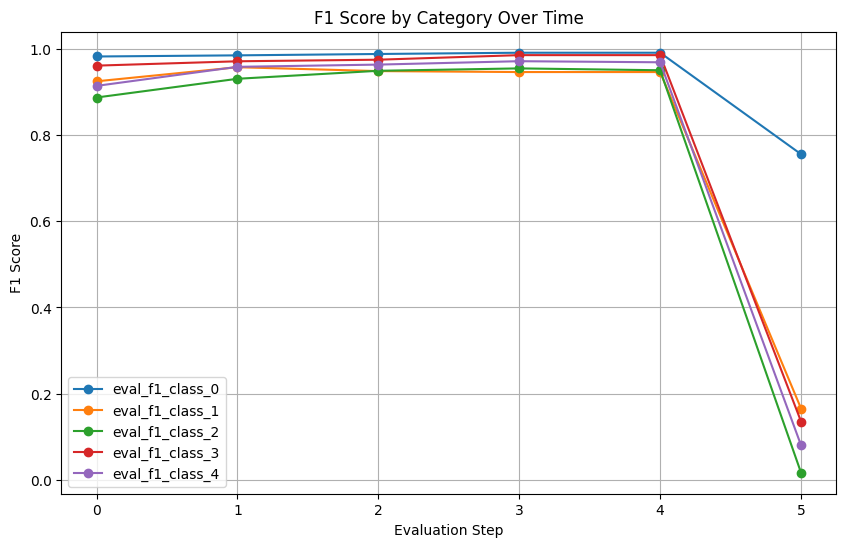

TrainOutput(global_step=99, training_loss=0.005328513798891858, metrics={'train_runtime': 185.1764, 'train_samples_per_second': 4.261, 'train_steps_per_second': 0.535, 'total_flos': 6.145805501169869e+16, 'train_loss': 0.005328513798891858, 'epoch': 1.0})

In [11]:
boosted_training_args = TrainingArguments(
    f'Vit_Lora',
    remove_unused_columns=False,
    eval_strategy='epoch',
    learning_rate=0.0010382238423522643,
    per_device_train_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.3055683192436609,
    logging_steps=3,
    label_names=['labels'],
    save_steps=10,
    save_total_limit=2,
    evaluation_strategy="epoch",
)

boosted_trainer = Trainer(
    model=model,
    args=boosted_training_args,
    train_dataset=boost_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    tokenizer=image_processor,
    callbacks=[metrics_callback]
)

# Fine-tune the model
boosted_trainer.train()

In [12]:
# Model evaluation

# Initialize another Trainer for evaluation
eval_trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=test_dataset,  # Replace with your actual test dataset
    compute_metrics=compute_metrics,
    tokenizer=image_processor,
    callbacks=[metrics_callback]
)

# Evaluate the saved model
eval_results = eval_trainer.evaluate()

# Print the evaluation results
print(eval_results)

<ipython-input-12-f52bb06984a3>:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  eval_trainer = Trainer(


{'eval_loss': 2.246821641921997, 'eval_model_preparation_time': 0.0078, 'eval_accuracy': 0.5412587412587413, 'eval_f1': 0.5076956935793091, 'eval_f1_class_0': 0.8405797101449275, 'eval_f1_class_1': 0.28342245989304815, 'eval_f1_class_2': 0.2619047619047619, 'eval_f1_class_3': 0.8653421633554084, 'eval_f1_class_4': 0.0, 'eval_runtime': 82.3005, 'eval_samples_per_second': 8.688, 'eval_steps_per_second': 1.094}
{'eval_loss': 2.246821641921997, 'eval_model_preparation_time': 0.0078, 'eval_accuracy': 0.5412587412587413, 'eval_f1': 0.5076956935793091, 'eval_f1_class_0': 0.8405797101449275, 'eval_f1_class_1': 0.28342245989304815, 'eval_f1_class_2': 0.2619047619047619, 'eval_f1_class_3': 0.8653421633554084, 'eval_f1_class_4': 0.0, 'eval_runtime': 82.3005, 'eval_samples_per_second': 8.688, 'eval_steps_per_second': 1.094}


## model saving eval

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,F1 Class 0,F1 Class 1,F1 Class 2,F1 Class 3,F1 Class 4
1,0.173100,0.158219,0.944000,0.942928,0.988458,0.898204,0.864957,0.985263,0.926995
2,0.136200,0.121974,0.955500,0.955015,0.989496,0.917933,0.904918,0.984227,0.941278
3,0.024900,0.113443,0.962000,0.961591,0.992639,0.921687,0.921569,0.985294,0.950564


{'eval_loss': 0.15821895003318787, 'eval_accuracy': 0.944, 'eval_f1': 0.9429280270192777, 'eval_f1_class_0': 0.9884575026232948, 'eval_f1_class_1': 0.8982035928143713, 'eval_f1_class_2': 0.864957264957265, 'eval_f1_class_3': 0.985263157894737, 'eval_f1_class_4': 0.9269949066213922, 'eval_runtime': 230.2805, 'eval_samples_per_second': 8.685, 'eval_steps_per_second': 1.086, 'epoch': 1.0}
{'eval_loss': 0.12197384983301163, 'eval_accuracy': 0.9555, 'eval_f1': 0.9550150859494605, 'eval_f1_class_0': 0.9894957983193277, 'eval_f1_class_1': 0.9179331306990883, 'eval_f1_class_2': 0.9049180327868852, 'eval_f1_class_3': 0.9842271293375395, 'eval_f1_class_4': 0.9412780656303972, 'eval_runtime': 233.3052, 'eval_samples_per_second': 8.572, 'eval_steps_per_second': 1.072, 'epoch': 2.0}
{'eval_loss': 0.11344324052333832, 'eval_accuracy': 0.962, 'eval_f1': 0.9615913927536068, 'eval_f1_class_0': 0.9926393270241851, 'eval_f1_class_1': 0.9216867469879518, 'eval_f1_class_2': 0.9215686274509803, 'eval_f1_cla

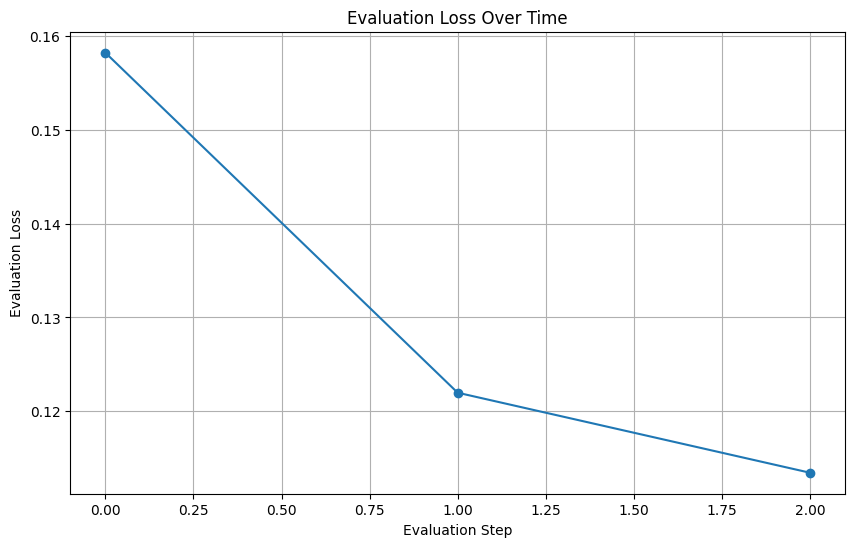

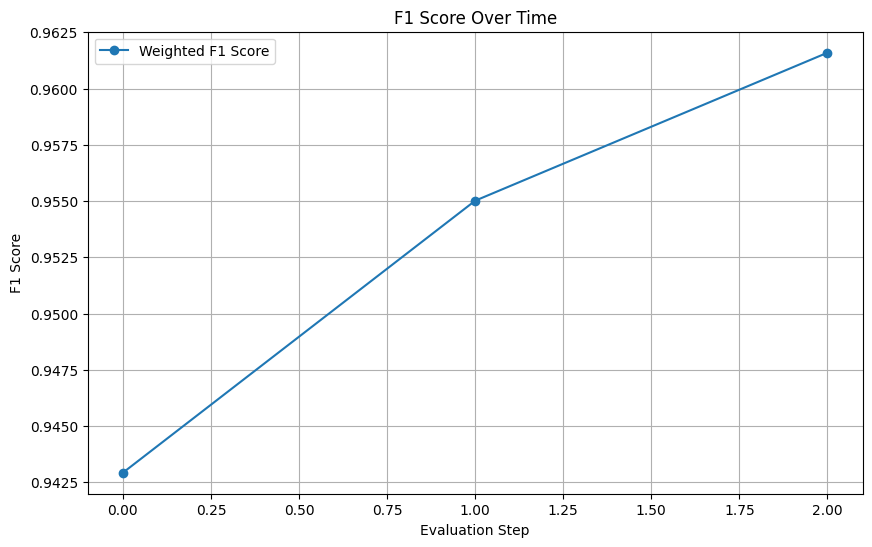

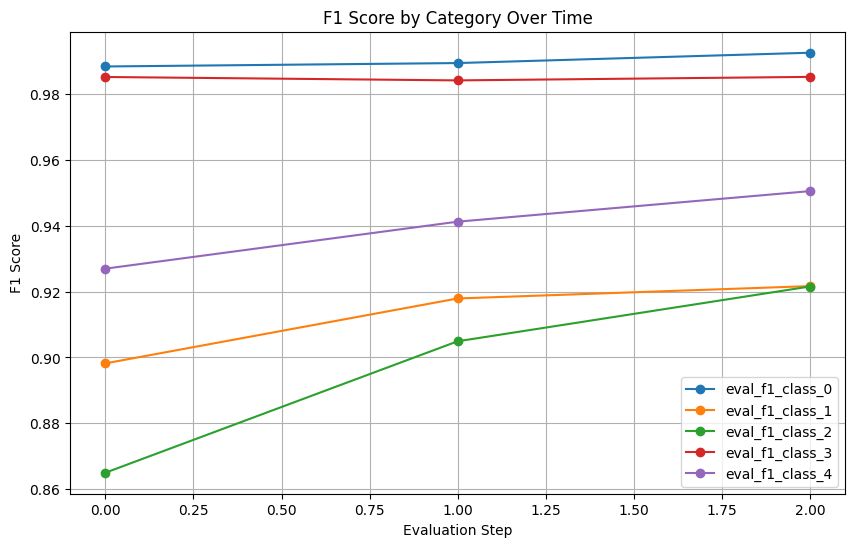

In [ ]:
# Save model
from transformers import Trainer, TrainingArguments, TrainerCallback, AutoModelForImageClassification
import matplotlib.pyplot as plt
import numpy as np
import torch
import evaluate
import os

# Define metrics
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

# Set a confidence threshold for low confidence
CONFIDENCE_THRESHOLD = 0.125  # Adjust this threshold based on your data

# Create a directory to save the plots
if not os.path.exists('plots'):
    os.makedirs('plots')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=-1)
    predictions = torch.argmax(probabilities, dim=-1).numpy()

    # Adjust predictions:
    for i, probs in enumerate(probabilities):
        # Exclude category 4 from the max confidence calculation
        filtered_probs = probs[:4]
        max_confidence = torch.max(filtered_probs).item()

        if max_confidence < CONFIDENCE_THRESHOLD:
            predictions[i] = 4  # assign to ks_5

    # Calculate accuracy
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)

    # Calculate F1 score for each category and average
    f1_per_category = f1_metric.compute(predictions=predictions, references=labels, average=None)
    f1_weighted = f1_metric.compute(predictions=predictions, references=labels, average='weighted')

    # Combine both metrics
    return {
        'accuracy': accuracy['accuracy'],
        'f1': f1_weighted['f1'],
        **{f'f1_class_{i}': f1 for i, f1 in enumerate(f1_per_category['f1'])}
    }

# Custom callback to track evaluation metrics
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.eval_losses = []
        self.f1_scores = []
        self.f1_class_scores = {}

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            print(metrics)
            self.eval_losses.append(metrics['eval_loss'])
            self.f1_scores.append(metrics['eval_f1'])

            # Track F1 scores per class
            for key in metrics:
                if key.startswith('eval_f1_class_'):
                    if key not in self.f1_class_scores:
                        self.f1_class_scores[key] = []
                    self.f1_class_scores[key].append(metrics[key])

    def on_train_end(self, args, state, control, **kwargs):
        # Plot eval loss over time
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.eval_losses)), self.eval_losses, marker='o')
        plt.title('Evaluation Loss Over Time')
        plt.xlabel('Evaluation Step')
        plt.ylabel('Evaluation Loss')
        plt.grid(True)
        plt.savefig('plots/eval_loss_over_time.png')
        plt.show()

        # Plot F1 score over time
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.f1_scores)), self.f1_scores, marker='o', label='Weighted F1 Score')
        plt.title('F1 Score Over Time')
        plt.xlabel('Evaluation Step')
        plt.ylabel('F1 Score')
        plt.grid(True)
        plt.legend()
        plt.savefig('plots/f1_score_over_time.png')
        plt.show()

        # Plot F1 scores by category over time
        plt.figure(figsize=(10, 6))
        for key, values in self.f1_class_scores.items():
            plt.plot(range(len(values)), values, marker='o', label=key)
        plt.title('F1 Score by Category Over Time')
        plt.xlabel('Evaluation Step')
        plt.ylabel('F1 Score')
        plt.grid(True)
        plt.legend()
        plt.savefig('plots/f1_score_by_category_over_time.png')
        plt.show()

# Instantiate the custom callback
metrics_callback = MetricsCallback()

# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/Saved_model",  # Directory to save the model
    remove_unused_columns=False,
    eval_strategy='epoch',
    learning_rate=0.00016578956505166272,
    per_device_train_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.1895016273644022,
    logging_steps=10,
    label_names=['labels'],
    save_steps=10,
    save_total_limit=2,
    evaluation_strategy="epoch",
)

# Fine-tune the model
trainer = Trainer(
    model=model.to(device),
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    tokenizer=image_processor,
    callbacks=[metrics_callback]
)

trainer.train()

# Save the fine-tuned model
trainer.save_model(training_args.output_dir)  # This saves the model and configuration

In [ ]:
# After training, load the model from the saved checkpoint for evaluation
model_path = "/content/drive/MyDrive/2024 Autograding Summer Research/Implementation/StudentSimulator/Pyramid_Challenge/Saved_model"
model = AutoModelForImageClassification.from_pretrained(model_path)

# Initialize another Trainer for evaluation
eval_trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=real_test_data,
    compute_metrics=compute_metrics,
    tokenizer=image_processor,
    callbacks=[metrics_callback]
)

# Evaluate the saved model
eval_results = eval_trainer.evaluate()

# Print the evaluation results
print(eval_results)

{'eval_loss': 8.448817253112793, 'eval_model_preparation_time': 0.0065, 'eval_accuracy': 0.24772568229531142, 'eval_f1': 0.09836779756874957, 'eval_f1_class_0': 0.0, 'eval_f1_class_1': 0.0, 'eval_f1_class_2': 0.0, 'eval_f1_class_3': 0.0, 'eval_f1_class_4': 0.3970835670218733, 'eval_runtime': 167.5454, 'eval_samples_per_second': 8.529, 'eval_steps_per_second': 1.068}
{'eval_loss': 8.448817253112793, 'eval_model_preparation_time': 0.0065, 'eval_accuracy': 0.24772568229531142, 'eval_f1': 0.09836779756874957, 'eval_f1_class_0': 0.0, 'eval_f1_class_1': 0.0, 'eval_f1_class_2': 0.0, 'eval_f1_class_3': 0.0, 'eval_f1_class_4': 0.3970835670218733, 'eval_runtime': 167.5454, 'eval_samples_per_second': 8.529, 'eval_steps_per_second': 1.068}
